<a href="https://colab.research.google.com/github/Timixojo/Timixojo/blob/main/7001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Upload the ABX₃ Perovskite dataset

In [1]:
#Import library functions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#Load ABX₃ Perovskite dataset

df = pd.read_csv("/content/abc dataset.csv")

df

In [4]:
#Clean dataset
#Drop irrelevant columns and remove missing values

df_clean = df.drop(columns=['bulk_modulus (GPa)', 'shear_modulus (GPa)']).dropna()

In [5]:
#Define features to use for X and Y
#Select features and target to use from ABX₃ Perovskite dataset

features = [
    'formation_energy (eV/atom)', 'energy_above_hull (eV/atom)',
    'density (g/cc)', 'volume (cubic-angstrom)',
    'a_edge (angstrom)', 'b_edge (angstrom)', 'c_edge (angstrom)',
    'alpha_ang (deg)', 'beta_ang (deg)', 'gamma_ang (deg)'
]
target = 'band_gap (eV)'

X = df_clean[features].dropna()

y = df_clean[target]

y = y[X.index]  # Align y with cleaned X

In [6]:
# Train/Test Split
#Define 70% Training and 30% test for X and y.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [9]:
#Decision Tree Regression
#Train DT model

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

DecisionTreeRegressor()

In [10]:
#Create a model to predict test data

y_predict = model.predict(X_test)

In [13]:
#Using DT to evaluate metrics

print("DECISION TREE RESULTS")

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_predict))

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_predict))

print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_predict)))

print("R² Score:", r2_score(y_test, y_predict))

DECISION TREE RESULTS
Mean Absolute Error (MAE): 0.6797019751280174
Mean Squared Error (MSE): 1.5577572742648134
Root Mean Squared Error (RMSE): 1.2481014679363267
R² Score: 0.29877358942307863


In [14]:
#Random Forest Regression
#Train RF model

model = RandomForestRegressor(n_estimators=200, random_state=1)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=1)

In [ ]:
#Create a model to predict test data

y_predict = model.predict(X_test)

In [16]:
#Using RF to evaluate metrics

print("RANDOM FOREST RESULTS")

print("Mean Absolute Error:", mean_absolute_error(y_test, y_predict))

print("Mean Squared Error:", mean_squared_error(y_test, y_predict))

print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_predict)))

print("R² Score:", r2_score(y_test, y_predict))

RANDOM FOREST RESULTS
Mean Absolute Error: 0.567121591441112
Mean Squared Error: 0.7941178309441216
Root Mean Squared Error: 0.8911328918540273
R² Score: 0.6425268523102315


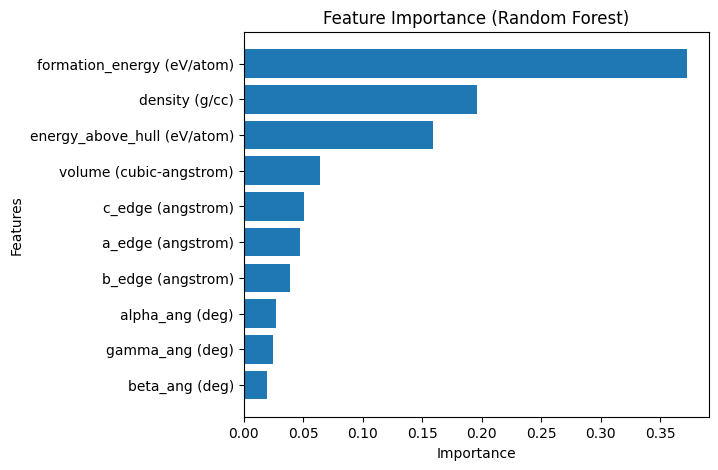

In [19]:
#Plot feature importance for Random Forest

importances = model.feature_importances_ # Get the importance score of each feature from the trained Random Forest model

feature_names = X.columns # Store the feature names (column names) for labelling the plot

indices = np.argsort(importances)[::-1] # Sort feature indices by importance in descending order (most important first)

plt.figure(figsize=(6, 5))
plt.barh(range(len(importances)), importances[indices]) # Draw a horizontal bar chart using sorted importances

plt.yticks(range(len(importances)), feature_names[indices]) # Label each bar with the corresponding feature name

plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")

plt.gca().invert_yaxis() # Flip the y-axis so the most important feature appears at the top

plt.show()

In [20]:
#Support Vector Regressor (RBF Kernel)
#Train SVR model

model = SVR(kernel='rbf')

model.fit(X_train, y_train)

SVR()

In [21]:
#Create a model to predict test data

y_predict = model.predict(X_test)

In [22]:
#Using SVR to evaluate metrics

print("SUPPORT VECTOR REGRESSOR (SVR) RESULTS")

print("Mean Absolute Error:", mean_absolute_error(y_test, y_predict))

print("Mean Squared Error:", mean_squared_error(y_test, y_predict))

print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_predict)))

print("R² Score:", r2_score(y_test, y_predict))

SUPPORT VECTOR REGRESSOR (SVR) RESULTS
Mean Absolute Error: 0.9675933493181171
Mean Squared Error: 2.203903864578048
Root Mean Squared Error: 1.4845551066154627
R² Score: 0.007909883172241061


In [25]:
#Extreme Gradient Boosting Regression
#Train XGB model

from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=None)

model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
#Create a model to predict test data

y_predict = model.predict(X_test)

In [27]:
#Using XGBoost to evaluate metrics

print("XGBOOST RESULTS")

print("Mean Absolute Error:", mean_absolute_error(y_test, y_predict))

print("Mean Squared Error:", mean_squared_error(y_test, y_predict))

print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_predict)))

print("R² Score:", r2_score(y_test, y_predict))

XGBOOST RESULTS
Mean Absolute Error: 0.5769672320565657
Mean Squared Error: 0.8341938895033694
Root Mean Squared Error: 0.9133421535784765
R² Score: 0.6244865637762975


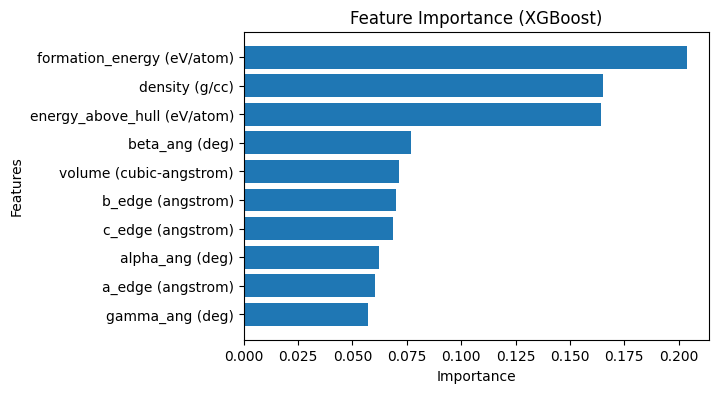

In [31]:
#Feature Importance Plot for XGBoost

importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6, 4))
plt.barh(range(len(importances)), importances[indices])
plt.yticks(range(len(importances)), feature_names[indices])

plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance (XGBoost)")
plt.gca().invert_yaxis()

plt.show()  # Display the plot

In [28]:
# Define evaluation metrics for each model

metrics_data = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R² Score'],
    'Decision Tree': [0.6797019751280174, 1.5577572742648134, 1.2481014679363267, 0.29877358942307863],
    'Random Forest': [0.567121591441112, 0.7941178309441216, 0.8911328918540273, 0.6425268523102315],
    'SVR (RBF)': [0.9675933493181171, 2.203903864578048, 1.4845551066154627, 0.007909883172241061],
    'XGBoost': [0.5769672320565657, 0.8341938895033694, 0.9133421535784765, 0.6244865637762975]
}

# Create the comparison DataFrame
comparison_df = pd.DataFrame(metrics_data)

print("Model Comparison Table:")

comparison_df

Model Comparison Table:


,Metric,Decision Tree,Random Forest,SVR (RBF),XGBoost
0,MAE,0.679702,0.567122,0.967593,0.576967
1,MSE,1.557757,0.794118,2.203904,0.834194
2,RMSE,1.248101,0.891133,1.484555,0.913342
3,R² Score,0.298774,0.642527,0.007910,0.624487


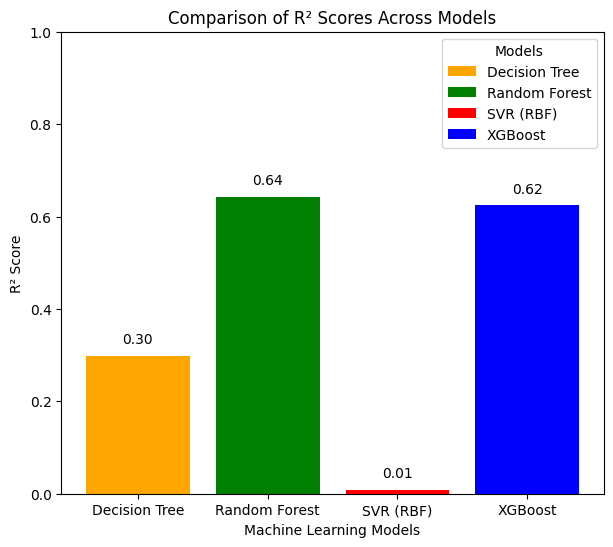

In [44]:
# Define model names and their corresponding R² scores

model_names = ['Decision Tree', 'Random Forest', 'SVR (RBF)', 'XGBoost']

r2_scores = [0.298774, 0.642527, 0.007910, 0.624487]  # Replace with exact values if needed

# Define custom colours for each model
colors = ['orange', 'green', 'red', 'blue']

# Create Bar Chart
plt.figure(figsize=(7, 6))
bars = plt.bar(model_names, r2_scores, color=colors)

plt.xlabel('Machine Learning Models')
plt.ylabel('R² Score')
plt.title('Comparison of R² Scores Across Models')
plt.ylim(0, 1)
#plt.grid(axis='y')

# Add value labels on top of bars
for bar, score in zip(bars, r2_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom')

plt.legend(bars, model_names, title='Models')

plt.show()

RANDOM FOREST CROSS-VALIDATION (R² Score)
Fold R² Scores: [0.4872 0.4797 0.6479 0.6817 0.5467]
Average R² Score: 0.5686286654982395


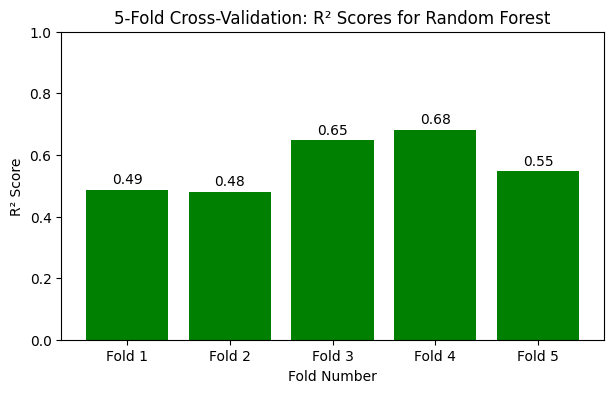

In [47]:
# Define the Random Forest model

from sklearn.model_selection import cross_val_score

model = RandomForestRegressor(n_estimators=200, random_state=1)

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("RANDOM FOREST CROSS-VALIDATION (R² Score)")

print("Fold R² Scores:", np.round(scores, 4))

print("Average R² Score:", scores.mean())

# Plot the R² scores
plt.figure(figsize=(7, 4))
plt.bar(range(1, 6), scores, color='green')
plt.ylim(0, 1)
plt.xticks(range(1, 6), labels=[f'Fold {i}' for i in range(1, 6)])

plt.ylabel("R² Score")
plt.xlabel("Fold Number")
plt.title("5-Fold Cross-Validation: R² Scores for Random Forest")
#plt.grid(axis='y')

# Annotate bar values
for i, score in enumerate(scores):
    plt.text(i + 1, score + 0.02, f"{score:.2f}", ha='center')

plt.show()

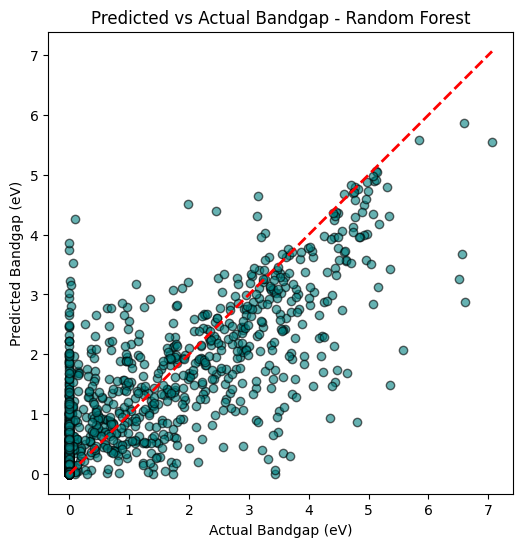

In [52]:
# Predict using the Random Forest model
model = RandomForestRegressor(n_estimators=200, random_state=1)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

# Create the scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_predict, alpha=0.6, color='teal', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)

plt.xlabel("Actual Bandgap (eV)")
plt.ylabel("Predicted Bandgap (eV)")
plt.title("Predicted vs Actual Bandgap - Random Forest")
#plt.grid(True)
plt.axis('equal')

plt.show()

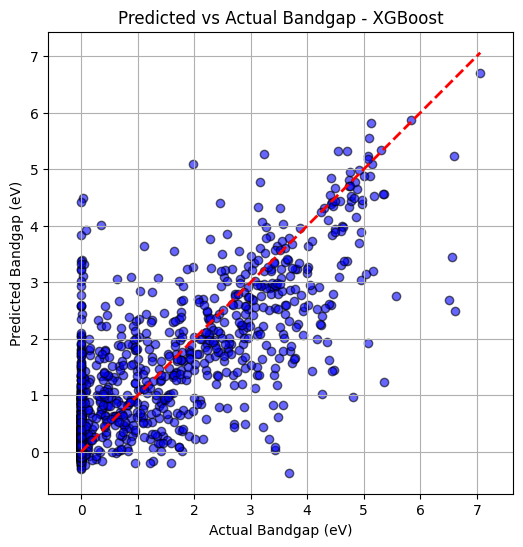

In [51]:
#Predict using XGBoost model
model = XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=None)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_predict, alpha=0.6, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual Bandgap (eV)")
plt.ylabel("Predicted Bandgap (eV)")
plt.title("Predicted vs Actual Bandgap - XGBoost")
plt.grid(True)
plt.axis('equal')

plt.show()